**Workshop**

ดึงข้อมูลหุ้น หรือ Crypto หรือ forex มา ระยะเวลาอย่างน้อย 3 ปีขึ้นไป เป็น Daily Data
และ หา 6M SMA Bollinger Band

## Import data

In [14]:
import yfinance as yf
import mplfinance as mpf
import pandas_ta as ta

In [15]:
# define asset and date
ticker_name = 'AAPL'
start='2018-01-01' 
end='2021-12-31'

In [16]:
raw_df = yf.download(tickers=ticker_name, start=start, end=end)

[*********************100%***********************]  1 of 1 completed


## Bollinger Band

In [17]:
# create bollinger bands (rolling 6 months)
raw_df['mean'] = raw_df['Close'].rolling(120).mean()
raw_df['std'] = raw_df['Close'].rolling(120).std()

# upper and lower band (2SD)
raw_df['upper_band'] = raw_df['mean'] + raw_df['std'] * 2
raw_df['lower_band'] = raw_df['mean'] - raw_df['std'] * 2

In [18]:
raw_df

,Open,High,Low,Close,Adj Close,Volume,mean,std,upper_band,lower_band
Date,,,,,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.950493,102223600,NaN,NaN,NaN,NaN
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.943371,118071600,NaN,NaN,NaN,NaN
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.133556,89738400,NaN,NaN,NaN,NaN
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.601868,94640000,NaN,NaN,NaN,NaN
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.447350,82271200,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-12-23,175.850006,176.850006,175.270004,176.279999,175.262802,68356600,151.855167,9.582555,171.020278,132.690056
2021-12-27,177.089996,180.419998,177.070007,180.330002,179.289444,74919600,152.153167,9.904716,171.962599,132.343734
2021-12-28,180.160004,181.330002,178.529999,179.289993,178.255432,79144300,152.453583,10.175121,172.803826,132.103341


<AxesSubplot: xlabel='Date'>

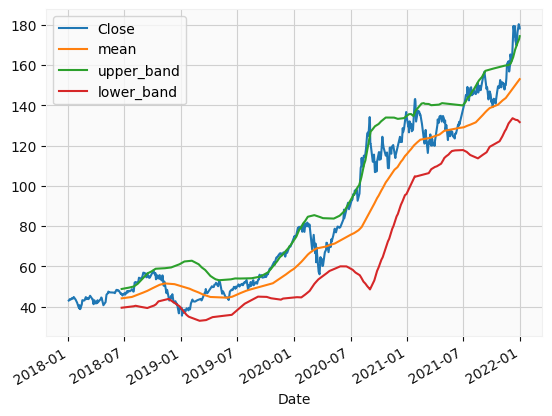

In [19]:
raw_df[['Close', 'mean', 'upper_band', 'lower_band']].plot()

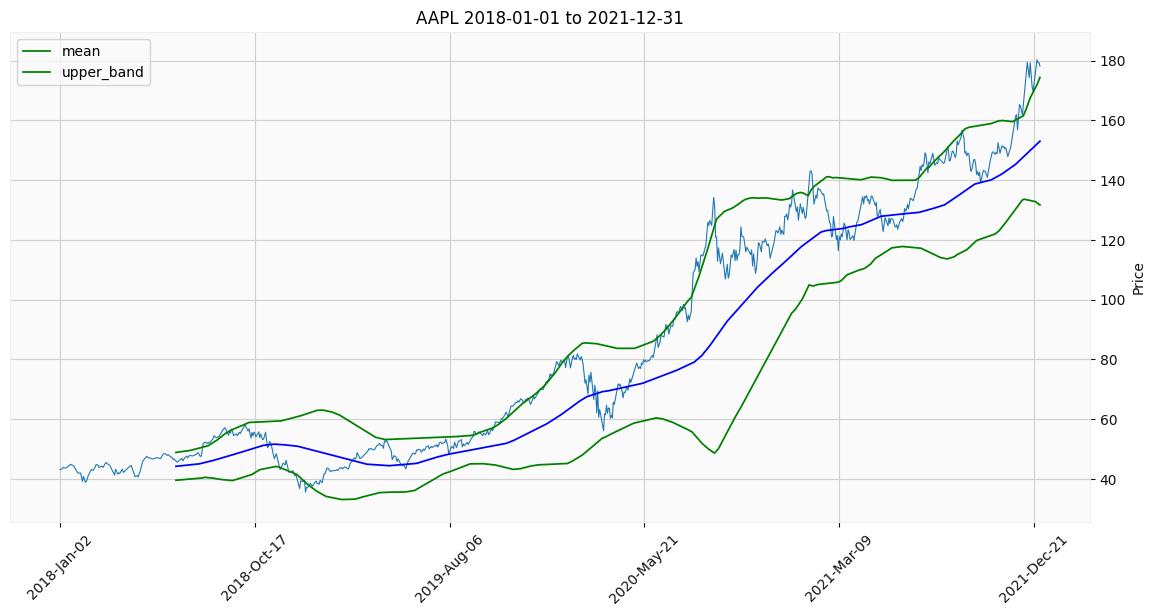

In [22]:
# creat 'added_plots' type 'dict' because we want to make an legend for visualization
added_plots = {
            'mean'  :    mpf.make_addplot(raw_df['mean'], color='blue'),
            'upper_band'  :    mpf.make_addplot(raw_df['upper_band'], color='green'),
            'lower_band'  :    mpf.make_addplot(raw_df['lower_band'], color='green'),
}

fig, axes = mpf.plot(   raw_df, style='yahoo', type='line', addplot=list(added_plots.values()), figsize=(15, 7),
                        axtitle=f'{ticker_name} {start} to {end}', returnfig=True)

# added legend
axes[0].legend([None]*(len(added_plots)+2))
handles = axes[0].get_legend().legendHandles
axes[0].legend(handles=handles[2:],labels=list(added_plots.keys()))